In [ ]:
//geofencig algo with  geocoding//

import geopy.distance
import schedule
import time
import requests
from datetime import datetime

MAPMYINDIA_API_KEY = "your_api_key_here"
GEOFENCE_RADIUS = 5000  #meter
truck_current_location = None
geofence_center = None
truck_entry_time = None
truck_exit_time = None
buffer_time_log = []

def geocode_location(location):
    
    try:
        response = requests.get(
            f"https://apis.mapmyindia.com/advancedmaps/v1/{MAPMYINDIA_API_KEY}/geocode",
            params={"addr": location}
        )
        if response.status_code == 200:
            data = response.json()
            if "results" in data and len(data["results"]) > 0:
                result = data["results"][0]
                return result["latitude"], result["longitude"]
            else:
                print("No geocoding results found for the location.")
        else:
            print("Failed to geocode location:", response.status_code, response.text)
    except Exception as e:
        print("Error in geocoding:", e)
    return None

def fetch_location():
    """Fetch truck's current location using MapmyIndia API."""
    try:
        response = requests.get(f"https://apis.mapmyindia.com/advancedmaps/v1/{MAPMYINDIA_API_KEY}/current-location")
        if response.status_code == 200:
            location_data = response.json()
            return (location_data['latitude'], location_data['longitude'])
        else:
            print("Failed to fetch location:", response.status_code, response.text)
    except Exception as e:
        print("Error fetching location:", e)
    return None

def fetch_initial_location(start_location):
    """Fetch the initial geofence center based on a user-provided location."""
    initial_coords = geocode_location(start_location)
    if initial_coords:
        print(f"Initial geofence center set to: {initial_coords}")
    else:
        print("Failed to fetch initial geofence center. Please check your geocoding API.")
        exit(1)
    return initial_coords

def calculate_geofence():
    """Adjust geofence center if the truck changes its route significantly."""
    global geofence_center, truck_current_location
    if truck_current_location:
        distance_from_center = geopy.distance.geodesic(truck_current_location, geofence_center).meters
        if distance_from_center > GEOFENCE_RADIUS:
            geofence_center = truck_current_location
            print(f"Geofence updated to new center: {geofence_center}")

def track_truck():
    """Track truck's location and calculate entry/exit times for geofences."""
    global truck_current_location, truck_entry_time, truck_exit_time, buffer_time_log

    truck_location = fetch_location()
    if not truck_location:
        print("Unable to fetch truck location. Skipping this cycle.")
        return

    truck_current_location = truck_location
    print(f"Truck current location: {truck_current_location}")

    distance_from_geofence_center = geopy.distance.geodesic(truck_current_location, geofence_center).meters

    if distance_from_geofence_center <= GEOFENCE_RADIUS:
        if not truck_entry_time:
            truck_entry_time = datetime.now()
            print(f"Truck entered geofence at {truck_entry_time}")
    else:
        if truck_entry_time:
            truck_exit_time = datetime.now()
            buffer_time = (truck_exit_time - truck_entry_time).total_seconds()
            buffer_time_log.append({
                "entry_time": truck_entry_time,
                "exit_time": truck_exit_time,
                "buffer_time": buffer_time
            })
            print(f"Truck exited geofence at {truck_exit_time}. Buffer time: {buffer_time} seconds.")
            truck_entry_time = None  # Reset entry time for the next cycle

def report():
    """Generate a report on truck movements and geofence entries/exits."""
    print("Buffer Time Log:")
    for log in buffer_time_log:
        print(log)

# User Input for Start and Destination Locations
start_location = input("Enter the start location: ")
destination_location = input("Enter the destination location: ")

# Initialize geofence center
geofence_center = fetch_initial_location(start_location)

# Get the destination's coordinates for MIS reports or further use
destination_coords = geocode_location(destination_location)
if destination_coords:
    print(f"Destination coordinates: {destination_coords}")

# Schedule the tasks
schedule.every(10).minutes.do(track_truck)
schedule.every(1).hour.do(calculate_geofence)
schedule.every(1).hour.do(report)

print("Dynamic Geofencing System Started")
while True:
    schedule.run_pending()
    time.sleep(1)


In [1]:
pip install opencv-python-headless numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install opencv-python numpy matplotlib

Box Dimensions Analysis:
Box 1:
  Length: 20.03 cm
  Width:  10.00 cm
  Height: 14.02 cm

Box 2:
  Length: 26.68 cm
  Width:  10.00 cm
  Height: 18.68 cm

Box 3:
  Length: 71.99 cm
  Width:  10.00 cm
  Height: 50.39 cm

Box 4:
  Length: 18.20 cm
  Width:  10.00 cm
  Height: 12.74 cm

Box 5:
  Length: 55.56 cm
  Width:  10.00 cm
  Height: 38.89 cm

Box 6:
  Length: 25.00 cm
  Width:  10.00 cm
  Height: 17.50 cm

Box 7:
  Length: 68.47 cm
  Width:  10.00 cm
  Height: 47.93 cm

Box 8:
  Length: 16.20 cm
  Width:  10.00 cm
  Height: 11.34 cm

Box 9:
  Length: 50.00 cm
  Width:  10.00 cm
  Height: 35.00 cm

Box 10:
  Length: 45.28 cm
  Width:  10.00 cm
  Height: 31.69 cm

Box 11:
  Length: 104.99 cm
  Width:  10.00 cm
  Height: 73.50 cm

Box 12:
  Length: 29.89 cm
  Width:  10.00 cm
  Height: 20.92 cm

Box 13:
  Length: 47.50 cm
  Width:  10.00 cm
  Height: 33.25 cm



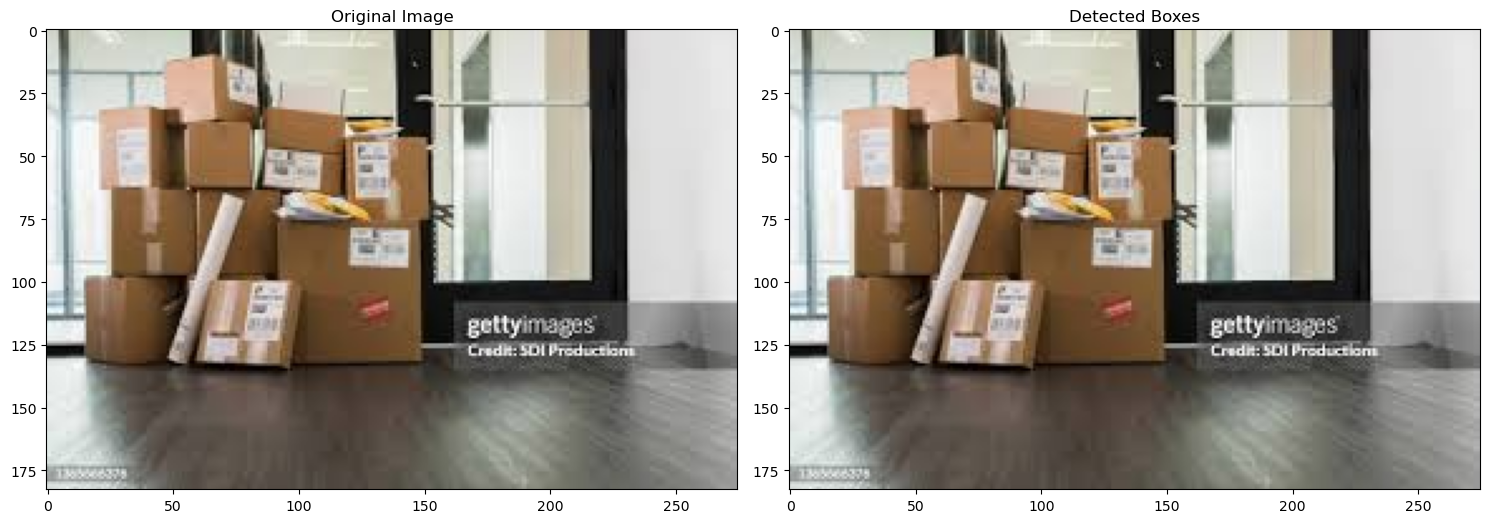

[(20.028260576481845, 10.0, 14.01978240353729),
 (26.681952805306192, 10.0, 18.677366963714334),
 (71.99254703973385, 10.0, 50.394782927813694),
 (18.196458751941574, 10.0, 12.7375211263591),
 (55.55555555555556, 10.0, 38.888888888888886),
 (25.0, 10.0, 17.5),
 (68.4706893065759, 10.0, 47.92948251460313),
 (16.200137173630488, 10.0, 11.34009602154134),
 (50.0, 10.0, 35.0),
 (45.27692569068708, 10.0, 31.693847983480953),
 (104.99299696534386, 10.0, 73.4950978757407),
 (29.88939725682116, 10.0, 20.92257807977481),
 (47.5, 10.0, 33.25)]

In [1]:
#BOX COUNTER VISUALISER AND MEASUREMENT

pip install opencv-python-headless numpy
!pip install opencv-python numpy matplotlib
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ParcelDimensionAnalyzer:
    def __init__(self):
        self.reference_size = 10  # Default reference size in cm

    def upload_and_analyze_image(self, file_path, reference_size=None):
       
        # Remove any surrounding quotes and normalize path
        file_path = file_path.strip('"\'')
        
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"Error: File not found at {file_path}")
            return None
        
        # Set reference size
        if reference_size:
            self.reference_size = reference_size
        
        # Read the image with error handling
        try:
            image = cv2.imread(file_path)
            
            # Check if image is loaded correctly
            if image is None:
                print(f"Error: Unable to read the image at {file_path}")
                return None
            
            # Convert to RGB for matplotlib
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Detect and measure box dimensions
            dimensions = self.detect_box_dimensions(image)
            
            #Visualization of results
            plt.figure(figsize=(15,10))
            plt.subplot(1,2,1)
            plt.imshow(image_rgb)
            plt.title('Original Image')
            
            plt.subplot(1,2,2)
            plt.imshow(image_rgb)
            plt.title('Detected Boxes')
            
            #Printing dimensions
            print("Box Dimensions Analysis:")
            for i, (length, width, height) in enumerate(dimensions, 1):
                print(f"Box {i}:")
                print(f"  Length: {length:.2f} cm")
                print(f"  Width:  {width:.2f} cm")
                print(f"  Height: {height:.2f} cm\n")
            
            plt.tight_layout()
            plt.show()
            
            return dimensions
        
        except Exception as e:
            print(f"An error occurred: {e}")
            return None

    def detect_box_dimensions(self, image):
        #grayscale conversion
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        #Gaussian blur for noise reduction
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        
        
        
        edges = cv2.Canny(blurred, 50, 150)
        
        #find contours
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        #Process contours to identify boxes
        box_dimensions = []
        for contour in contours:
            # Approximate the contour to a polygon
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
            
            #check if the contour looks like a rectangle
            if len(approx) == 4:
                # Get the minimum area rectangle
                rect = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rect)
                box = np.int0(box)
                
                # Calculate side lengths
                sides = [
                    np.linalg.norm(box[0] - box[1]),
                    np.linalg.norm(box[1] - box[2])
                ]
                
                
                #Assumes the reference object is the smallest side
                scale_factor = self.reference_size / min(sides)
                length = max(sides) * scale_factor
                width = min(sides) * scale_factor
                
                # Estimate height (this is an approximation)
                height = length * 0.7  # Rough estimation
                
                box_dimensions.append((length, width, height))
        
        return box_dimensions

#Creating an instance of the analyzer
analyzer = ParcelDimensionAnalyzer()

analyzer.upload_and_analyze_image(r"C:\Users\KIIT\Desktop\parcel3.jpeg", reference_size=10)